## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['seaborn-bright','dark_background'])

## Importing required dataset of heart failure record downloaded from the Kaggle dataset.

In [2]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#### Here in our dataset DEATH EVENT is our dependent feature which consists of binary values so it will be classification problem and we will consider it as our target variable. Also, other  features are our independent variable.

### Cheacking null values if any present in our dataset.

In [3]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Cheacking data type of all features present in our data set

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### Finding  number of unique values present in each feature.

In [5]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

#### In our dataset features like anaemia,diabetes,high_blood_pressure,sex,smoking consists of bianary values just because they consists only two unique values.

#### Visualization of correlation between independent features and target variable.

In [6]:
correlation = data.corr()
correlation

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


### For better visualization ploting a heatmap with the seaborn library.

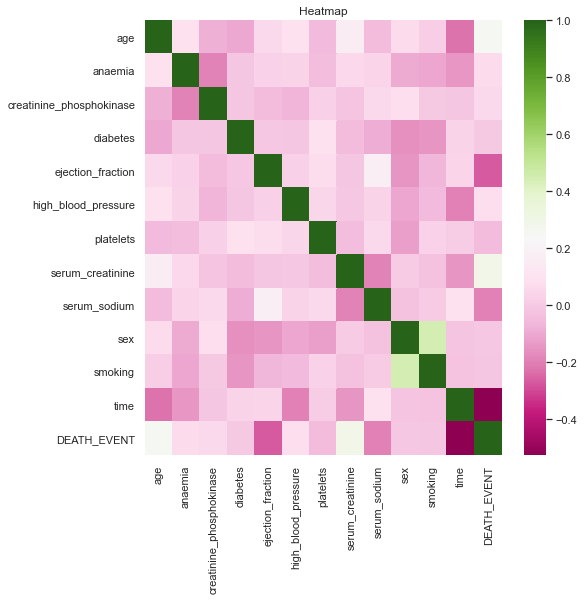

In [7]:
sns.set(rc = {'figure.figsize':(8,8)})
sns.heatmap(correlation,cmap="PiYG")
plt.title("Heatmap")
plt.show()

### It seems like the feature age and serum creatinine has little bit positive correlation and ejection fraction also has little negetive correlation on death event, on other hand time has better negetive correlation with target.But others features dosen't impact that much.

#### Dividing out data into two parts as independent variables and target variable.

In [8]:
X = data.drop(columns=['DEATH_EVENT'])
Y = data['DEATH_EVENT']

#### Scaling the X dataset

In [9]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
column = X.columns
scaled_X = scale.fit_transform(X)
scaled_X = pd.DataFrame(scaled_X,columns=column)
scaled_X.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879


#### Spliting data as train and test data.

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(scaled_X,Y,test_size=0.2,random_state=101)

#### Importing the different classification models for compairing score with each other.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [12]:
models = []
models.append(("LogisticRegression",LogisticRegression()))
models.append(("DescisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
models.append(("SupportVector",SVC()))
models.append(("KNeighbors",KNeighborsClassifier()))

In [13]:
for name,model in models:
    model.fit(X_train,Y_train)
    train_score = model.score(X_train,Y_train)
    test_score = model.score(X_test,Y_test)
    print(name,"train score =",train_score)
    print(name,"test score =",test_score)

LogisticRegression train score = 0.8493723849372385
LogisticRegression test score = 0.8666666666666667
DescisionTree train score = 1.0
DescisionTree test score = 0.8
RandomForest train score = 1.0
RandomForest test score = 0.9166666666666666
SupportVector train score = 0.8870292887029289
SupportVector test score = 0.8333333333333334
KNeighbors train score = 0.7949790794979079
KNeighbors test score = 0.7833333333333333


#### It looks like Random Forest leads score comparision on our dataset against logistic regression,descisiontree,svm and KNN.

#### Cheacking score of our Random Forest model on our test data set for different max_depth.

In [14]:
for i in range(1,20):
    model = RandomForestClassifier(max_depth=i)
    model.fit(X_train,Y_train)
    score = model.score(X_test,Y_test)
    print("for max depth ",i,"score =",score)

for max depth  1 score = 0.8166666666666667
for max depth  2 score = 0.9
for max depth  3 score = 0.9333333333333333
for max depth  4 score = 0.9
for max depth  5 score = 0.9
for max depth  6 score = 0.9166666666666666
for max depth  7 score = 0.8833333333333333
for max depth  8 score = 0.8833333333333333
for max depth  9 score = 0.8666666666666667
for max depth  10 score = 0.8833333333333333
for max depth  11 score = 0.9166666666666666
for max depth  12 score = 0.8833333333333333
for max depth  13 score = 0.8666666666666667
for max depth  14 score = 0.9
for max depth  15 score = 0.8666666666666667
for max depth  16 score = 0.9
for max depth  17 score = 0.8666666666666667
for max depth  18 score = 0.9
for max depth  19 score = 0.8666666666666667


#### For max depth 3 it gives maximum score

In [15]:
model = RandomForestClassifier(max_depth=3)
model.fit(X_train,Y_train)
prediction = model.predict(X_test)
probablities = model.predict_proba(X_test)
model.score(X_test,Y_test)

0.9333333333333333

### We have created a model using RandomForestClassifier with accuracy score 0.934 i.e 93.4%

#### Creating confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,prediction))

[[44  1]
 [ 3 12]]


#### Creating classification report

In [17]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       0.92      0.80      0.86        15

    accuracy                           0.93        60
   macro avg       0.93      0.89      0.91        60
weighted avg       0.93      0.93      0.93        60



## Ploting the Precision-Recall Curve

In [18]:
from sklearn.metrics import precision_recall_curve
precision_points, recall_points, threshold_points = precision_recall_curve(Y_test,probablities[:,1])
precision_points.shape, recall_points.shape, threshold_points.shape

((26,), (26,), (25,))

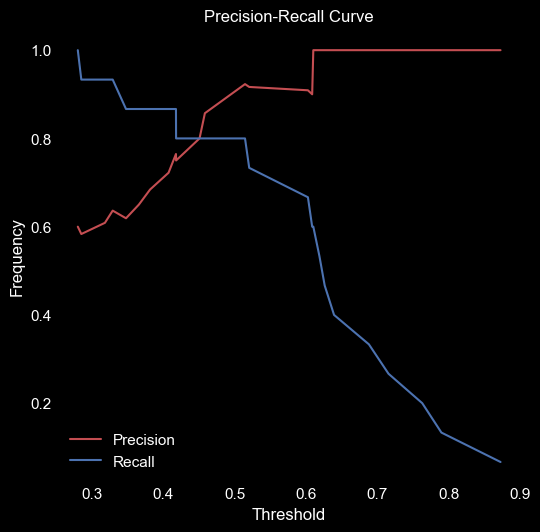

In [19]:
plt.style.use(['seaborn-dark','dark_background'])
plt.figure(dpi =100, figsize=(6,6))
plt.plot(threshold_points, precision_points[:-1], color = 'r', label = 'Precision')
plt.plot(threshold_points, recall_points[:-1], color = 'b', label = 'Recall')
plt.xlabel('Threshold')
plt.ylabel('Frequency')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Ploting AUC-ROC curve

In [20]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, threshold = roc_curve(Y_test ,probablities[:,1])

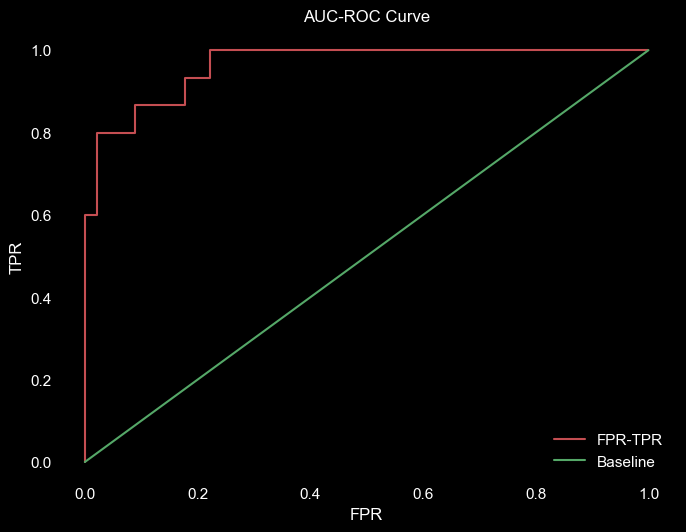

In [21]:
plt.style.use(['seaborn-dark','dark_background'])
plt.figure(dpi = 100, figsize=(8,6))
plt.plot(fpr,tpr, color = 'r', label='FPR-TPR')
plt.plot([0,1],[0,1], color = 'g', label = 'Baseline')
plt.title('AUC-ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()